In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import sklearn libraries for using Logistic Regression model

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Mobile Customer Churn

In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn with the goal of characterising customers who churn and building a simple predictive model to predict churn from available features. 

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus.  The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).  

The data is provided in file `MobileCustomerChurn.csv` and column headings are defined in a file `MobileChurnDataDictionary.csv` (store these in the `files` folder in your project).

Your high level goal in this notebook are to:
* look for significant clusters within the churn data - you might look separately at those who churn and those who don't or group them all together. 
* try to build and evaluate a predictive model for churn - predict the value of the CHURN_IND field in the data from some of the other fields


In [3]:
fpath = 'C:/Users/P1331215/Documents/GitHub/portfolio-rishabhgargau/files/'

In [4]:
churn = pd.read_csv(os.path.join("files", fpath + "MobileCustomerChurn.csv"), na_values=["NA", "#VALUE!"], index_col='INDEX')
churn.head()

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,...,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
INDEX,,,,,,,,,,,,,,,,,,,,,
1,1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,...,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,NaN,NaN,NaN
2,2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,...,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,NaN,NaN,NaN
3,5,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,...,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,NaN,NaN,NaN
4,6,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,...,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,NaN,NaN,NaN
5,8,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,...,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,NaN,NaN,NaN


In [5]:
churn.shape

(46206, 21)

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46206 entries, 1 to 46206
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CUST_ID                       46206 non-null  int64  
 1   ACCOUNT_TENURE                46206 non-null  int64  
 2   ACCT_CNT_SERVICES             46206 non-null  int64  
 3   AGE                           46130 non-null  float64
 4   CFU                           46206 non-null  object 
 5   SERVICE_TENURE                46206 non-null  int64  
 6   PLAN_ACCESS_FEE               46206 non-null  float64
 7   BYO_PLAN_STATUS               46206 non-null  object 
 8   PLAN_TENURE                   46206 non-null  int64  
 9   MONTHS_OF_CONTRACT_REMAINING  46206 non-null  int64  
 10  LAST_FX_CONTRACT_DURATION     46206 non-null  int64  
 11  CONTRACT_STATUS               46206 non-null  object 
 12  PREV_CONTRACT_DURATION        46206 non-null  int64  
 13  H

In [7]:
churn.isnull().sum()

CUST_ID                             0
ACCOUNT_TENURE                      0
ACCT_CNT_SERVICES                   0
AGE                                76
CFU                                 0
SERVICE_TENURE                      0
PLAN_ACCESS_FEE                     0
BYO_PLAN_STATUS                     0
PLAN_TENURE                         0
MONTHS_OF_CONTRACT_REMAINING        0
LAST_FX_CONTRACT_DURATION           0
CONTRACT_STATUS                     0
PREV_CONTRACT_DURATION              0
HANDSET_USED_BRAND                  0
CHURN_IND                           0
MONTHLY_SPEND                       0
COUNTRY_METRO_REGION                1
STATE                               1
RECON_SMS_NEXT_MTH              17790
RECON_TELE_NEXT_MTH             17790
RECON_EMAIL_NEXT_MTH            17790
dtype: int64

#### As shown above, 76 records missing values in Age, 1 record missing in REGION and STATE each
#### so we will remove these from our dataset 

In [8]:
churn[churn['COUNTRY_METRO_REGION'].isna()]

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,...,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
INDEX,,,,,,,,,,,,,,,,,,,,,
23119,43285,94,1,52.0,CONSUMER,194,72.72,NON BYO,3,21,...,ON-CONTRACT,24,APPLE,0,72.72,NaN,NaN,0.0,0.0,0.0


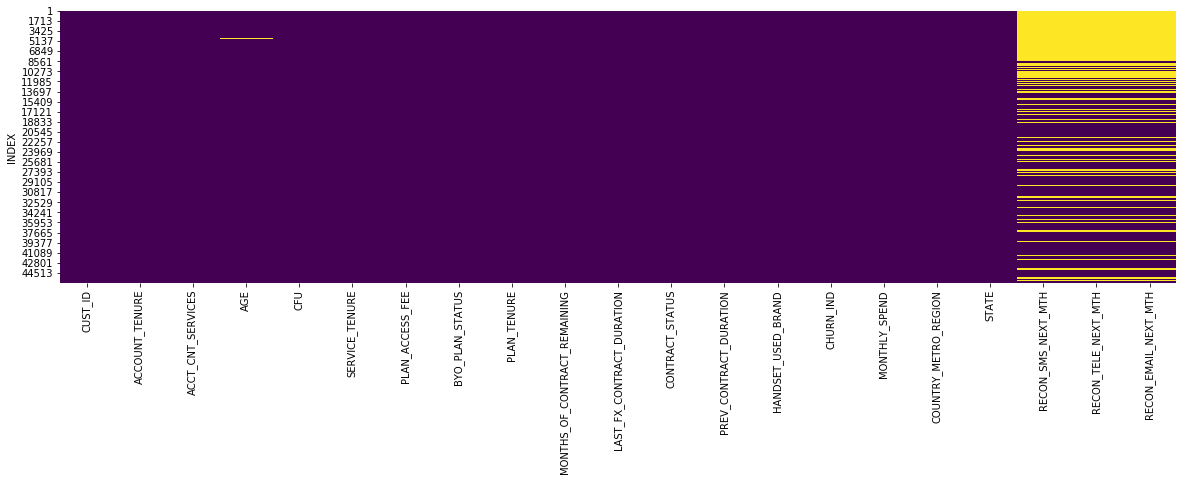

In [9]:
plt.figure(figsize=(20,5))
sns.heatmap(churn.isnull(), cbar=False, cmap='viridis')

#### As shown above, yellow lines are the missing values in respective columns
1. 76 records missing values in Age, so we will remove these from our dataset 
2. 1 record missing values in COUNTRY_METRO_REGION and STATE, so we will remove that as well
2. Remove the following un-relevant columns since they get populated only post churn event:
    RECON_SMS_NEXT_MTH, RECON_TELE_NEXT_MTH, RECON_EMAIL_NEXT_MTH

In [10]:
churn.dropna(subset=['AGE'], inplace=True)
churn.dropna(subset=['COUNTRY_METRO_REGION'], inplace=True)
churn.drop(columns=['RECON_SMS_NEXT_MTH', 'RECON_TELE_NEXT_MTH', 'RECON_EMAIL_NEXT_MTH'], inplace=True)

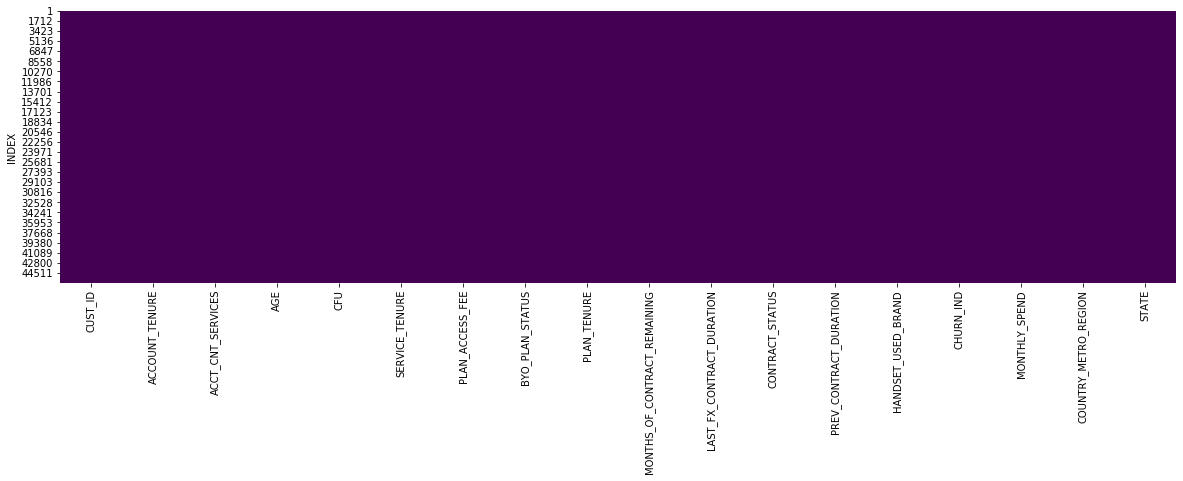

In [11]:
plt.figure(figsize=(20,5))
sns.heatmap(churn.isnull(), cbar=False, cmap='viridis')

#### As shown above, all null values are handled now

In [12]:
churn = churn.reset_index()
churn.shape

(46129, 19)

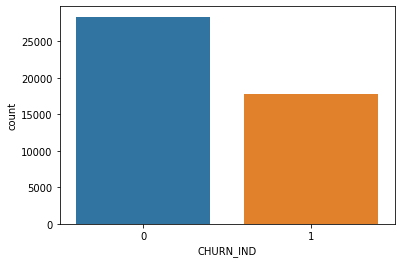

In [13]:
sns.countplot(x='CHURN_IND', data=churn)

#### As shown above, countplot directly counts the categorical column CHURN_IND, the target column to be predicted

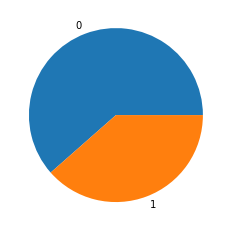

In [14]:
subset = churn['CHURN_IND'].value_counts()
plt.pie(subset, labels=subset.keys())
plt.show()

#### Pie chart to get more visual understanding of the target column CHURN_IND

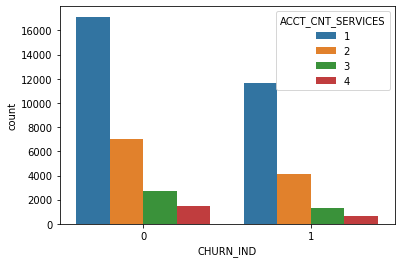

In [15]:
sns.countplot(x='CHURN_IND', data=churn, hue='ACCT_CNT_SERVICES')

#### Count of services doesn't seem to directly affect churn rate

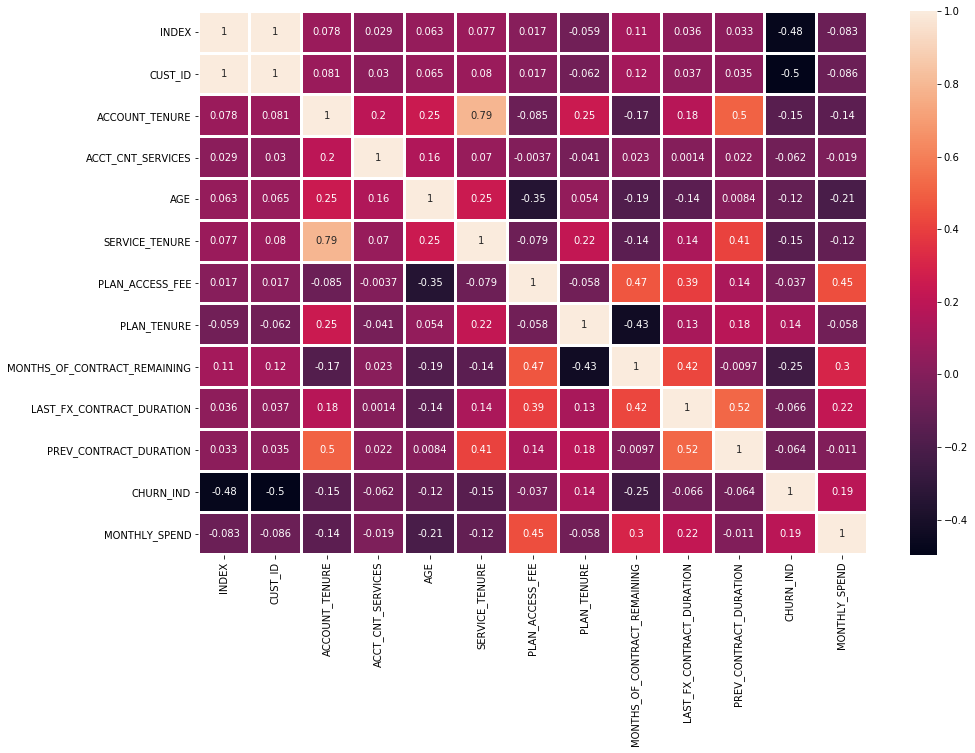

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(churn.corr(), annot=True, linewidths=2)

#### No clear strong correlations except account_tenure vs service_tenure, however, thats obvious

#### Now we prepare data for a Logistics Regression model with followign steps :- 
1. Convert following categorical columns to numerical columns using get_dummies function:
    CFU, BYO_PLAN_STATUS, CONTRACT_STATUS, COUNTRY_METRO_REGION

2. Remove the following categorical columns: 
    CFU, BYO_PLAN_STATUS, CONTRACT_STATUS, HANDSET_USED_BRAND, COUNTRY_METRO_REGION, STATE

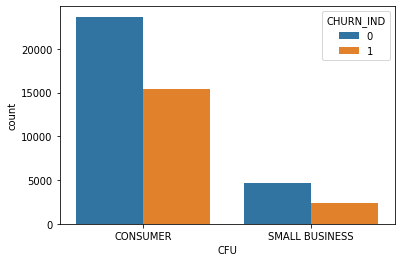

In [17]:
sns.countplot(x='CFU', data=churn, hue='CHURN_IND')

In [18]:
pd.get_dummies(churn['CFU'], prefix='CFU').head()

,CFU_CONSUMER,CFU_SMALL BUSINESS
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


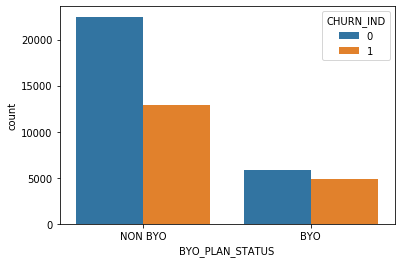

In [19]:
sns.countplot(x='BYO_PLAN_STATUS', data=churn, hue='CHURN_IND')

In [20]:
pd.get_dummies(churn['BYO_PLAN_STATUS']).head()

,BYO,NON BYO
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


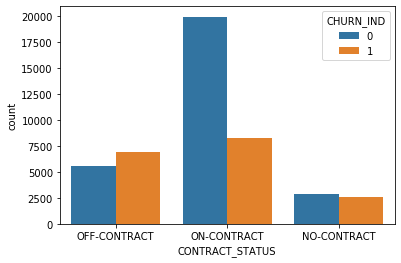

In [21]:
sns.countplot(x='CONTRACT_STATUS', data=churn, hue='CHURN_IND')

In [22]:
pd.get_dummies(churn['CONTRACT_STATUS']).head()

,NO-CONTRACT,OFF-CONTRACT,ON-CONTRACT
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


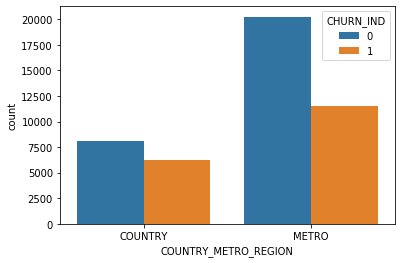

In [23]:
sns.countplot(x='COUNTRY_METRO_REGION', data=churn, hue='CHURN_IND')

In [24]:
pd.get_dummies(churn['COUNTRY_METRO_REGION'], prefix='REGION').head()

,REGION_COUNTRY,REGION_METRO
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [25]:
df_cfu = pd.get_dummies(churn['CFU'], prefix='CFU')
df_byo = pd.get_dummies(churn['BYO_PLAN_STATUS'])
df_contract = pd.get_dummies(churn['CONTRACT_STATUS'])
df_region = pd.get_dummies(churn['COUNTRY_METRO_REGION'], prefix='REGION')

In [26]:
churn.drop(columns=['CFU', 'BYO_PLAN_STATUS', 'CONTRACT_STATUS', 'HANDSET_USED_BRAND', 'COUNTRY_METRO_REGION', 'STATE']
          , inplace=True)

In [27]:
churn = churn.reset_index()

In [28]:
df = pd.concat([churn, df_cfu, df_byo, df_contract, df_region], axis=1)
df.head()

,index,INDEX,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,...,MONTHLY_SPEND,CFU_CONSUMER,CFU_SMALL BUSINESS,BYO,NON BYO,NO-CONTRACT,OFF-CONTRACT,ON-CONTRACT,REGION_COUNTRY,REGION_METRO
0,0,1,1,46,1,30.0,46,54.54,15,0,...,61.40,1,0,0,1,0,1,0,1,0
1,1,2,2,60,3,55.0,59,54.54,5,0,...,54.54,1,0,0,1,0,1,0,0,1
2,2,3,5,65,1,29.0,65,40.90,15,0,...,2.50,1,0,1,0,0,1,0,1,0
3,3,4,6,31,1,51.0,31,31.81,31,0,...,6.48,1,0,0,1,0,1,0,1,0
4,4,5,8,95,1,31.0,95,54.54,0,0,...,100.22,1,0,0,1,0,1,0,0,1


#### Now we are left with only numerical columns and dataframe is ready for model building

In [29]:
df.columns

Index(['index', 'INDEX', 'CUST_ID', 'ACCOUNT_TENURE', 'ACCT_CNT_SERVICES',
       'AGE', 'SERVICE_TENURE', 'PLAN_ACCESS_FEE', 'PLAN_TENURE',
       'MONTHS_OF_CONTRACT_REMAINING', 'LAST_FX_CONTRACT_DURATION',
       'PREV_CONTRACT_DURATION', 'CHURN_IND', 'MONTHLY_SPEND', 'CFU_CONSUMER',
       'CFU_SMALL BUSINESS', 'BYO', 'NON BYO', 'NO-CONTRACT', 'OFF-CONTRACT',
       'ON-CONTRACT', 'REGION_COUNTRY', 'REGION_METRO'],
      dtype='object')

In [30]:
df.drop(columns=['index', 'INDEX', 'CUST_ID'], inplace=True)

#### Dropping un-relevant columns of index and cutomer_id

In [31]:
df.columns

Index(['ACCOUNT_TENURE', 'ACCT_CNT_SERVICES', 'AGE', 'SERVICE_TENURE',
       'PLAN_ACCESS_FEE', 'PLAN_TENURE', 'MONTHS_OF_CONTRACT_REMAINING',
       'LAST_FX_CONTRACT_DURATION', 'PREV_CONTRACT_DURATION', 'CHURN_IND',
       'MONTHLY_SPEND', 'CFU_CONSUMER', 'CFU_SMALL BUSINESS', 'BYO', 'NON BYO',
       'NO-CONTRACT', 'OFF-CONTRACT', 'ON-CONTRACT', 'REGION_COUNTRY',
       'REGION_METRO'],
      dtype='object')

# Building Logistic Regression Model

In [32]:
# Segregate features from the target column - CHURN_IND

features = ['ACCOUNT_TENURE', 'ACCT_CNT_SERVICES', 'AGE', 'SERVICE_TENURE',
       'PLAN_ACCESS_FEE', 'PLAN_TENURE', 'MONTHS_OF_CONTRACT_REMAINING',
       'LAST_FX_CONTRACT_DURATION', 'PREV_CONTRACT_DURATION',
       'MONTHLY_SPEND', 'CFU_CONSUMER', 'CFU_SMALL BUSINESS', 'BYO', 'NON BYO',
       'NO-CONTRACT', 'OFF-CONTRACT', 'ON-CONTRACT', 'REGION_COUNTRY',
       'REGION_METRO']

X = df[features]
Y = df['CHURN_IND']

In [33]:
# Use model_selection function of train_test_split to create training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36903, 19)
(9226, 19)
(36903,)
(9226,)


#### Following step to fit the logistic model on training data

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\Users\P1331215\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Following step to generate prediction

In [36]:
predict_train = logmodel.predict(X_train)
predict_test = logmodel.predict(X_test)

#### Following step to see the regession model intercept and coeff. values

In [37]:
print(logmodel.intercept_)
print(logmodel.coef_)

[0.21274173]
[[-0.0062161  -0.01643772 -0.01457827 -0.00561837 -0.00601638  0.00913366
  -0.08027343  0.01041184 -0.01147973  0.01185268  0.22506116 -0.01241038
  -0.18678172  0.3994325   0.17739151  0.64426846 -0.6090092   0.23957092
  -0.02692014]]


In [38]:
X_train.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,MONTHLY_SPEND,CFU_CONSUMER,CFU_SMALL BUSINESS,BYO,NON BYO,NO-CONTRACT,OFF-CONTRACT,ON-CONTRACT,REGION_COUNTRY,REGION_METRO
34518,23,2,22.0,23,90.90,4,13,24,24,112.71,1,0,0,1,0,0,1,1,0
2560,93,1,35.0,137,54.54,24,0,24,24,133.37,1,0,0,1,0,1,0,0,1
28752,7,2,37.0,6,36.36,6,18,24,0,36.36,1,0,0,1,0,0,1,1,0
15879,32,1,43.0,32,17.27,3,0,24,24,17.27,1,0,0,1,0,1,0,1,0
44006,70,3,48.0,70,22.72,21,0,12,12,22.72,0,1,1,0,0,1,0,0,1


In [39]:
Y_train.head()

34518    1
2560     1
28752    0
15879    0
44006    0
Name: CHURN_IND, dtype: int64

In [40]:
predict_train[0:5]

array([0, 1, 0, 1, 0], dtype=int64)

#### As shown above, on comparing the top 5 records of Y_train and predict_train :- only 3 / 5 records are correctly predicted

In [41]:
len(list(Y_train))

36903

In [42]:
len(predict_train)

36903

In [43]:
correct = 0
incorrect = 0

# Run a loop to check the accuracy of each element of predict_train 
for i in range(len(list(Y_train))):
    if predict_train[i] == list(Y_train)[i]:
        correct +=1
    else:
        incorrect +=1;
        

# Calculate and print the accuracy of the prediction
print('correct: ', correct, '\t incorrect: ', incorrect, '\t total: ', correct+incorrect)
print('accuracy: ', correct/36903*100, '%')

correct:  26649 	 incorrect:  10254 	 total:  36903
accuracy:  72.21364116738476 %


#### As shown above, our model is only 72.21% correct on the training data

In [44]:
Y_test.head()

1365     1
36281    0
34344    0
9238     1
43372    0
Name: CHURN_IND, dtype: int64

In [45]:
predict_test[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

#### As shown above, on comparing the top 5 records of Y_test and predict_test :- only 1 / 5 records are correctly predicted

In [46]:
len(list(Y_test))

9226

In [47]:
len(predict_test)

9226

In [48]:
correct = 0
incorrect = 0

# Run a loop to check the accuracy of each element of predict_test 
for i in range(len(list(Y_test))):
    if predict_test[i] == list(Y_test)[i]:
        correct +=1
    else:
        incorrect +=1;
        

# Calculate and print the accuracy of the prediction
print('correct: ', correct, '\t incorrect: ', incorrect, '\t total: ', correct+incorrect)
print('accuracy: ', correct/9226*100, '%')

correct:  6685 	 incorrect:  2541 	 total:  9226
accuracy:  72.45827010622155 %


#### As shown above, our model is only 72.45% correct on the testing data, which seems to be cosistent with training data

# My prediction with logistic regression ends here...
### Next I have played with clustering with no substantial results

# Trial with clustering

In [49]:
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,CFU_CONSUMER,CFU_SMALL BUSINESS,BYO,NON BYO,NO-CONTRACT,OFF-CONTRACT,ON-CONTRACT,REGION_COUNTRY,REGION_METRO
0,0.003410,-0.664470,-0.747625,-0.084023,0.152467,0.424558,-0.987397,0.454268,0.796507,1.263677,-0.187585,0.424771,-0.424771,-0.550119,0.550119,-0.366137,1.645347,-1.256018,1.487072,-1.487072
1,0.426712,1.732599,0.890236,0.166252,0.152467,-0.598758,-0.987397,0.454268,0.796507,1.263677,-0.281055,0.424771,-0.424771,-0.550119,0.550119,-0.366137,1.645347,-1.256018,-0.672448,0.672448
2,0.577892,-0.664470,-0.813139,0.281763,-0.501586,0.424558,-0.987397,-1.039526,-0.296226,1.263677,-0.990117,0.424771,-0.424771,1.817749,-1.817749,-0.366137,1.645347,-1.256018,1.487072,-1.487072
3,-0.450129,-0.664470,0.628178,-0.372802,-0.937462,2.061864,-0.987397,0.454268,0.796507,1.263677,-0.935889,0.424771,-0.424771,-0.550119,0.550119,-0.366137,1.645347,-1.256018,1.487072,-1.487072
4,1.484968,-0.664470,-0.682111,0.859321,0.152467,-1.110417,-0.987397,0.454268,0.796507,1.263677,0.341350,0.424771,-0.424771,-0.550119,0.550119,-0.366137,1.645347,-1.256018,-0.672448,0.672448


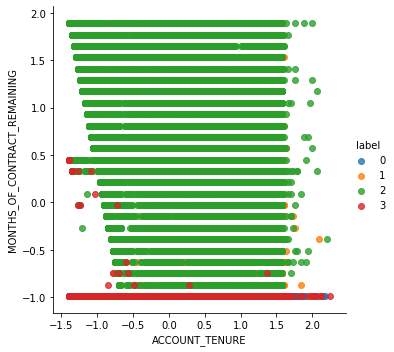

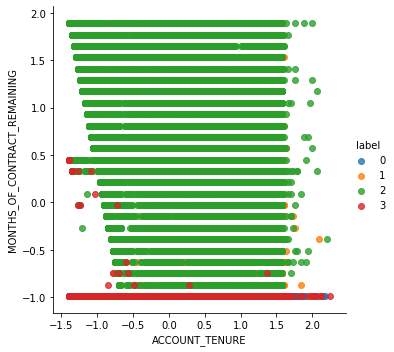

In [50]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(df_norm)

df_norm['label'] = kmeans.predict(df_norm)
_p = sns.lmplot('ACCOUNT_TENURE', 'MONTHS_OF_CONTRACT_REMAINING', data=df_norm, fit_reg=False, hue='label')
_p = sns.lmplot('ACCOUNT_TENURE', 'MONTHS_OF_CONTRACT_REMAINING', data=df_norm, fit_reg=False, hue='label')

In [51]:
df['CHURN_IND'].value_counts()

0    28366
1    17763
Name: CHURN_IND, dtype: int64

In [52]:
df1 = df[df['CHURN_IND']==1]
df0 = df[df['CHURN_IND']==0]

In [53]:
df1_norm = (df1 - df1.mean()) / df1.std()
df1_norm.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,CFU_CONSUMER,CFU_SMALL BUSINESS,BYO,NON BYO,NO-CONTRACT,OFF-CONTRACT,ON-CONTRACT,REGION_COUNTRY,REGION_METRO
0,0.203045,-0.622860,-0.609135,0.127748,0.207007,0.218945,-0.737286,0.499450,0.854218,NaN,-0.312543,0.390078,-0.390078,-0.610839,0.610839,-0.411743,1.256779,-0.936722,1.358368,-1.358368
1,0.643275,1.926416,1.048167,0.417469,0.207007,-0.694144,-0.737286,0.499450,0.854218,NaN,-0.381192,0.390078,-0.390078,-0.610839,0.610839,-0.411743,1.256779,-0.936722,-0.736136,0.736136
2,0.800500,-0.622860,-0.675427,0.551187,-0.474441,0.218945,-0.737286,-0.886541,-0.209617,NaN,-0.901962,0.390078,-0.390078,1.637002,-1.637002,-0.411743,1.256779,-0.936722,1.358368,-1.358368
3,-0.268631,-0.622860,0.782999,-0.206546,-0.928573,1.679888,-0.737286,0.499450,0.854218,NaN,-0.862134,0.390078,-0.390078,-0.610839,0.610839,-0.411743,1.256779,-0.936722,1.358368,-1.358368
4,1.743850,-0.622860,-0.542842,1.219775,0.207007,-1.150689,-0.737286,0.499450,0.854218,NaN,0.075934,0.390078,-0.390078,-0.610839,0.610839,-0.411743,1.256779,-0.936722,-0.736136,0.736136


In [54]:
df0_norm = (df0 - df0.mean()) / df0.std()
df0_norm.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,CFU_CONSUMER,CFU_SMALL BUSINESS,BYO,NON BYO,NO-CONTRACT,OFF-CONTRACT,ON-CONTRACT,REGION_COUNTRY,REGION_METRO
8141,-1.048903,-0.691281,1.525013,-0.758184,-0.944376,0.597501,-0.103851,0.425354,-1.470169,NaN,0.212094,0.445919,-0.445919,-0.511906,0.511906,-0.336024,-0.493582,0.650535,1.578870,-1.578870
8143,-0.025880,0.469419,0.801833,-0.139807,-0.305700,2.192256,-1.181865,0.425354,0.761659,NaN,0.541361,0.445919,-0.445919,-0.511906,0.511906,-0.336024,2.025934,-1.537143,-0.633342,0.633342
8147,0.636076,0.469419,-0.578783,-0.103432,0.972590,2.192256,-1.181865,0.425354,0.761659,NaN,2.067555,0.445919,-0.445919,-0.511906,0.511906,-0.336024,2.025934,-1.537143,1.578870,-1.578870
8157,-1.229437,-0.691281,-1.038988,-0.867310,0.972590,-0.085965,0.614824,0.425354,0.761659,NaN,-0.013037,-2.242483,2.242483,-0.511906,0.511906,-0.336024,-0.493582,0.650535,-0.633342,0.633342
8160,-0.116147,-0.691281,-0.578783,-0.194370,0.972590,-0.313788,0.854383,0.425354,0.761659,NaN,0.433170,0.445919,-0.445919,-0.511906,0.511906,-0.336024,-0.493582,0.650535,-0.633342,0.633342


In [55]:
dist = pdist(df1_norm, 'euclidean')
linkage_matrix = linkage(dist, method='ward')

ValueError: The condensed distance matrix must contain only finite values.

In [ ]:
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix)
plt.show()

### Following are some misc plots to get more visual understanding of the data

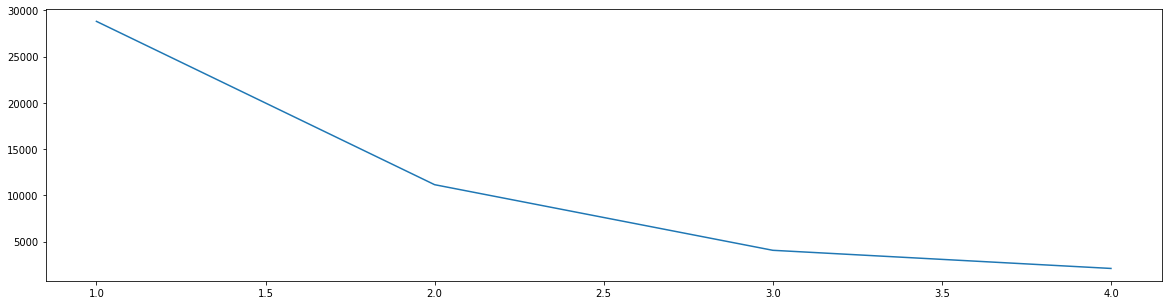

In [56]:
churn.ACCT_CNT_SERVICES.value_counts().sort_index().plot(figsize=(20,5))

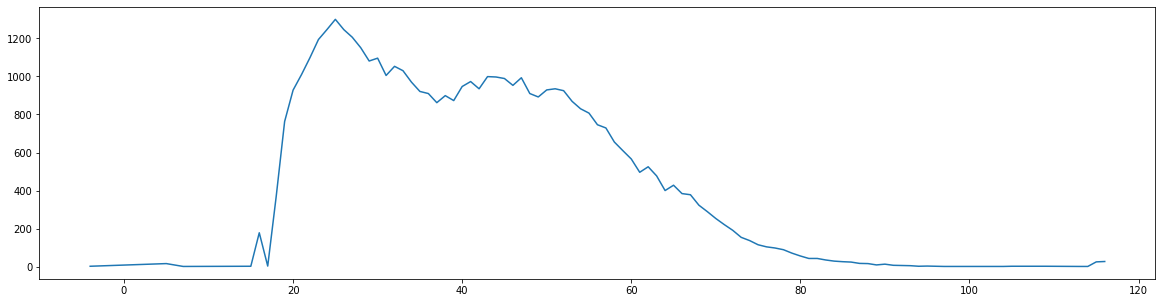

In [57]:
churn.AGE.value_counts().sort_index().plot(figsize=(20,5))

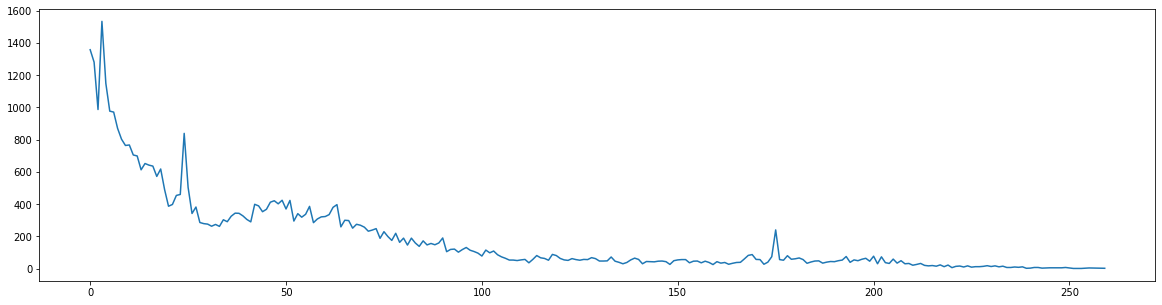

In [59]:
churn.SERVICE_TENURE.value_counts().sort_index().plot(figsize=(20,5))

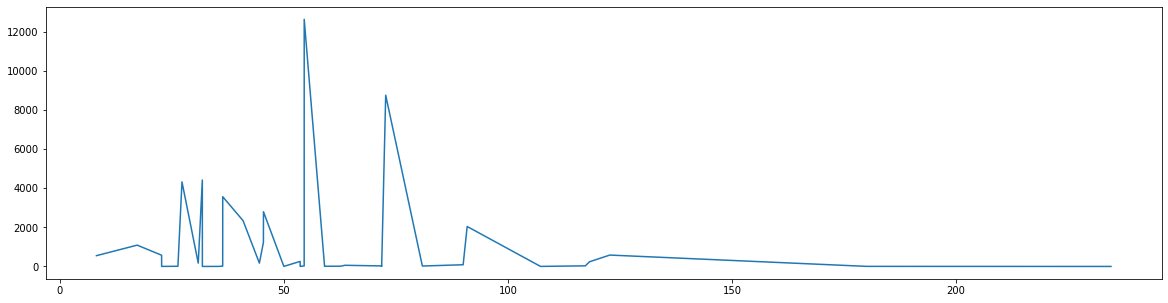

In [60]:
churn.PLAN_ACCESS_FEE.value_counts().sort_index().plot(figsize=(20,5))

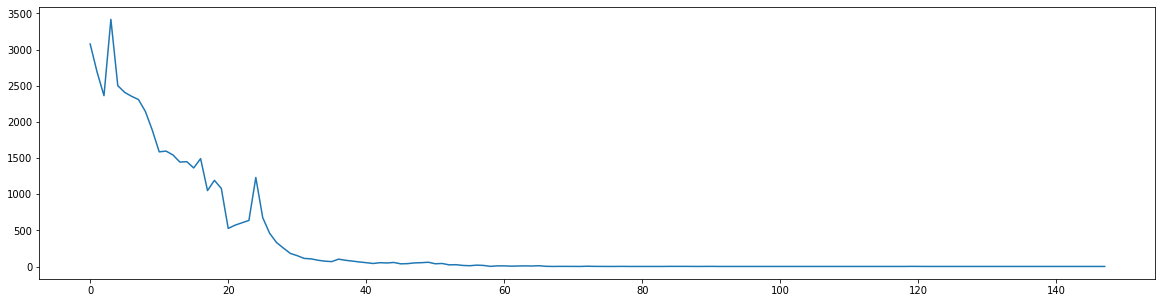

In [61]:
churn.PLAN_TENURE.value_counts().sort_index().plot(figsize=(20,5))

In [69]:
churn.CHURN_IND.value_counts()

0    28366
1    17763
Name: CHURN_IND, dtype: int64